# Model Cleaning

## Imports

In [296]:
# Internal functions
import clean
import tuning
from split import cr_pmt_split

# For model fitting
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data imports and cleaning

First, load the data and remove extraneous variables. Then, collapse categories at the respondent-level. Finally, move to collapse categories. 

In [297]:
# Import data
cr_df = clean.load_data("train.csv")

In [298]:
# Adjust missing values
cr_df = clean.handle_missing(cr_df)

# Collapse individual-level categories
cr_df = clean.clean_educ_cats(cr_df)
cr_df = clean.clean_marital_cats(cr_df)
cr_df = clean.clean_hhh_rel_cats(cr_df)

# Collapse household-level response categories
cr_df = clean.clean_pared_material_cats(cr_df)
cr_df = clean.clean_piso_material_cats(cr_df)
cr_df = clean.clean_sanitario_cats(cr_df)
cr_df = clean.clean_tipovivi_cats(cr_df)

## 2 | Feature engineering

This section creates features used in the analysis.

In [299]:
# TODO: Need to write these
cr_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4t3,escolari,...,"piso_material_mosaic, ceramic, terrazo",piso_material_other,piso_material_wood,rubbish_disposal_1 tanker truck,rubbish_disposal_3 burning,rubbish_disposal_6 other,tipovivi_fully paid,tipovivi_other,tipovivi_own,tipovivi_rented
0,ID_279628684,190000.0,0,3,0,1,1,0.0,1,10,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,1,12,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,1,11,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,4,9,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,4,11,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3 | Train-test split

Collapse the dataset into the household-level and create training, validation, and test sets to train models.

In [300]:
# Collapse data to household-level 
cr_df = clean.collapse_df(cr_df)
cr_df = clean.drop_indiv_vars(cr_df)

# Scale and center continuious variables
float_vars = ['v2a1', 'rooms', 'v18q1', 'r4t3','escolari', 'hhsize', \
              'hogar_nin', 'hogar_adul', 'hogar_mayor', 'bedrooms', 
              'qmobilephone', 'age']
cr_df = clean.scale_and_normalize(cr_df, float_vars)

In [301]:
# Conduct split
X_train, y_train, X_val, y_val, X_test, y_test = cr_pmt_split(cr_df)

Training set prior to SMOTE: 2390
Training set size after SMOTE: 5463
Validation set size after SMOTE: 781
Test set size: 598


In [302]:
# Conduct split for CV
X_train, y_train, X_test, y_test = cr_pmt_split(cr_df, cv = True)
X_train_resamp, y_train_resamp, _, _ = cr_pmt_split(cr_df, cv = True, oversample = True)

Training set size prior to CV 2390
Test set size 598
Training set size prior to CV 2390
Test set size 598
Training set size prior to CV (with SMOTE): 6244


## 4 | Model tuning

We tune 3 sets of models and store the various results in a list.

In [323]:
# Tune 3 sets of models
rf = tuning.tune_sklearn_models(X_train, y_train, 'RandomForestClassifier')

In [312]:
lm = tuning.tune_sklearn_models(X_train, y_train, 'LogisticRegression')

c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\micha\AppData\Local\pypoetry\Cache\virtualenvs\costa_rica_proxy_means_test-oy7JmmkA-py3.12\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mic

In [313]:
knn = tuning.tune_sklearn_models(X_train, y_train, 'KNeighborsClassifier')

In [330]:
# Use selected parameters manually
rf_model = RandomForestClassifier(criterion = 'gini', 
                                  n_estimators= 100,
                                  max_depth= 40,
                                  min_samples_leaf= 5,
                                  max_samples= 0.50)
rf_model.fit(X_train_resamp, y_train_resamp)

lm_model = LogisticRegression(max_iter=100, 
                              solver="liblinear", 
                              C=100, 
                              penalty= 'l1')
lm_model.fit(X_train_resamp, y_train_resamp)

knn_model = KNeighborsClassifier(n_neighbors= 100, weights = 'uniform')
knn_model.fit(X_train_resamp, y_train_resamp)

KNeighborsClassifier(n_neighbors=100)

In [331]:
# Storing MR trained CV values and then the best parameters as comments
tuning.create_estimate_table(rf, 'Random Forest', '../report/rf.csv')
tuning.create_estimate_table(lm, 'Logit', '../report/lm.csv')
tuning.create_estimate_table(knn, 'Logit', '../report/knn.csv')
print(rf[0][rf[2]]) # {'max_depth': 40, 'max_samples': 0.5, 'min_samples_leaf': 5, 'n_estimators': 100}
print(lm[0][lm[2]]) # {'C': 100, 'penalty': 'l1'}
print(knn[0][knn[2]]) # {'n_neighbors': 100, 'weights': uniform} MR is skeptical this isn't overfit

{'randomforestclassifier__max_depth': 40, 'randomforestclassifier__max_samples': 0.5, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 100}
{'logisticregression__C': 100, 'logisticregression__penalty': 'l1'}
{'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'uniform'}


Accuracy: 0.926809737347854
F1 Score (macro): 0.9269460027484457


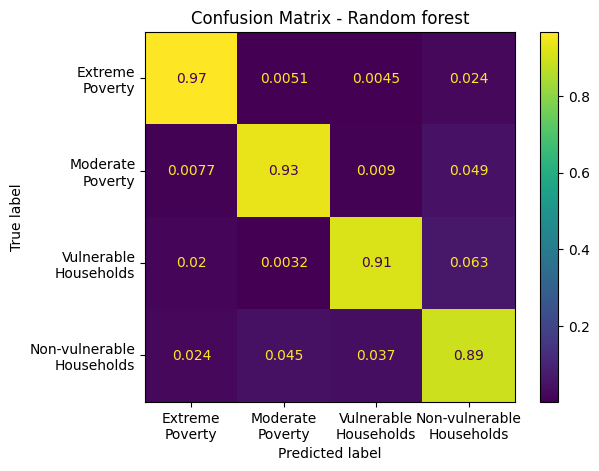

Accuracy: 0.5911274823830878
F1 Score (macro): 0.5757320884926711


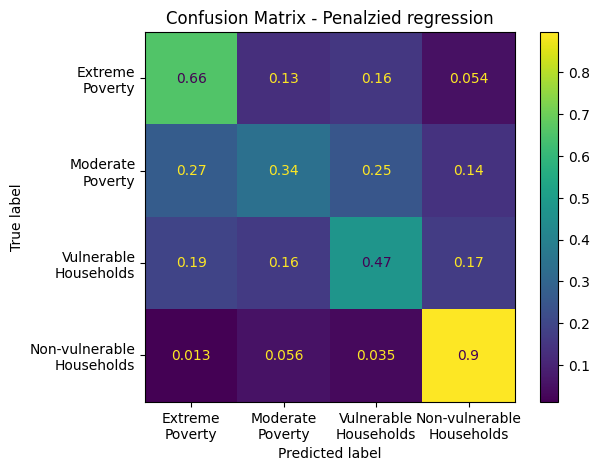

Accuracy: 0.6032991672005125
F1 Score (macro): 0.5965114014409537


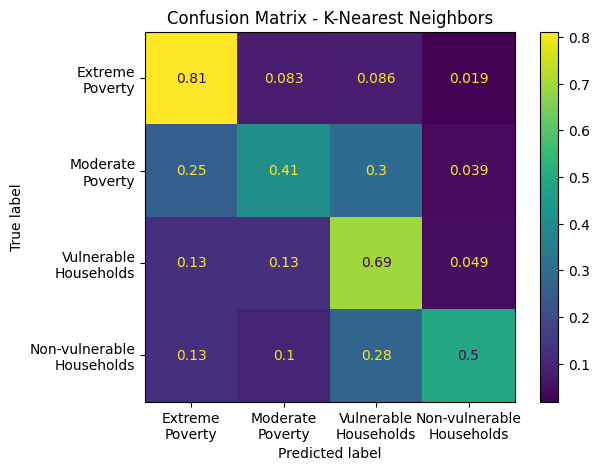

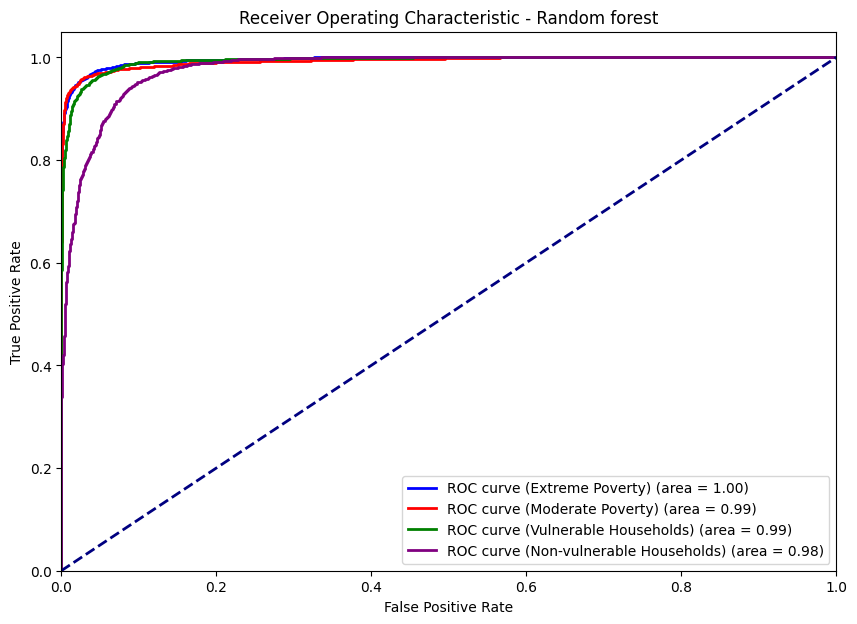

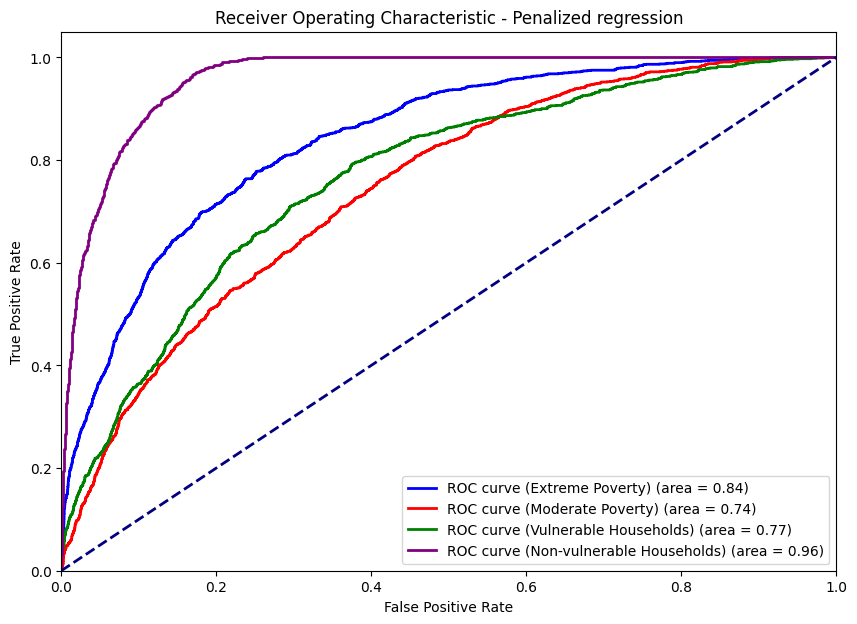

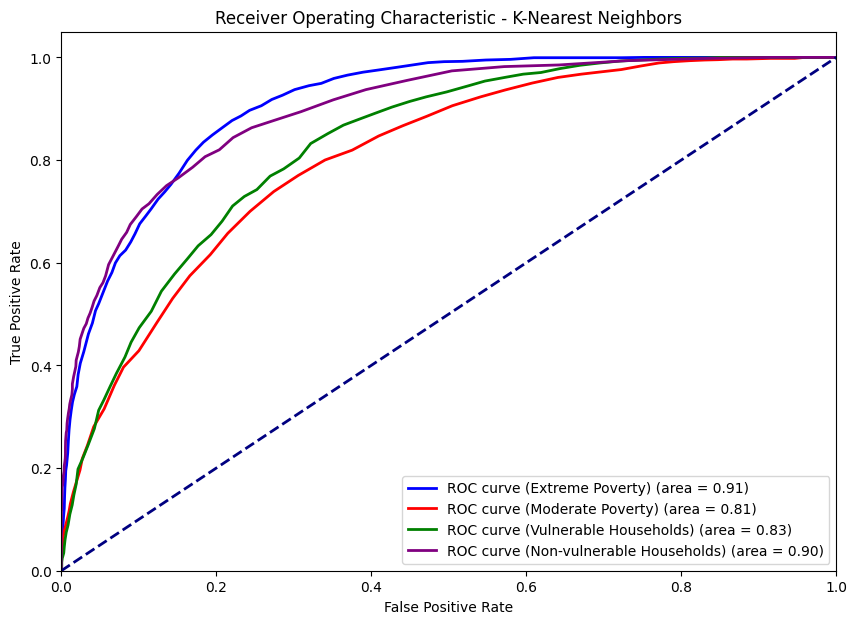

In [335]:
#Confusion matrix for Random Forest
tuning.visualize_acc(rf_model, "Random forest", X_train_resamp, y_train_resamp)
tuning.visualize_acc(lm_model, "Penalzied regression", X_train_resamp, y_train_resamp)
tuning.visualize_acc(knn_model, "K-Nearest Neighbors", X_train_resamp, y_train_resamp)

tuning.plot_roc_auc(rf_model, "Random forest", X_train_resamp, y_train_resamp)
tuning.plot_roc_auc(lm_model, "Penalized regression", X_train_resamp, y_train_resamp)
tuning.plot_roc_auc(knn_model,"K-Nearest Neighbors",  X_train_resamp, y_train_resamp)

Accuracy: 0.617056856187291
F1 Score (macro): 0.3655719454959375


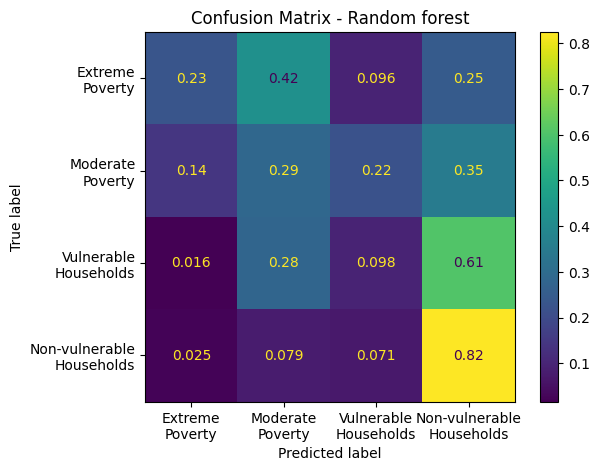

Accuracy: 0.6337792642140468
F1 Score (macro): 0.32670090887354164


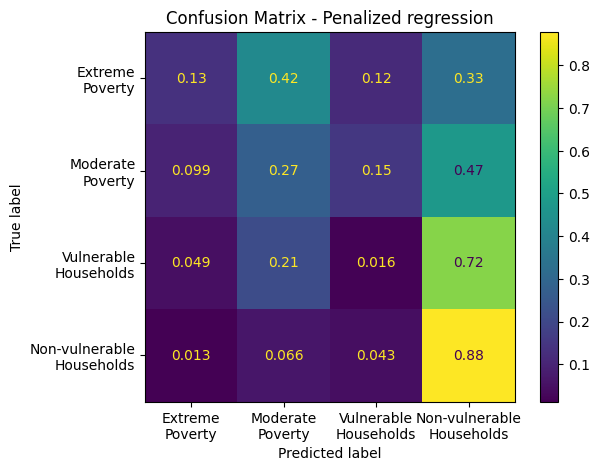

Accuracy: 0.4397993311036789
F1 Score (macro): 0.3518181521788011


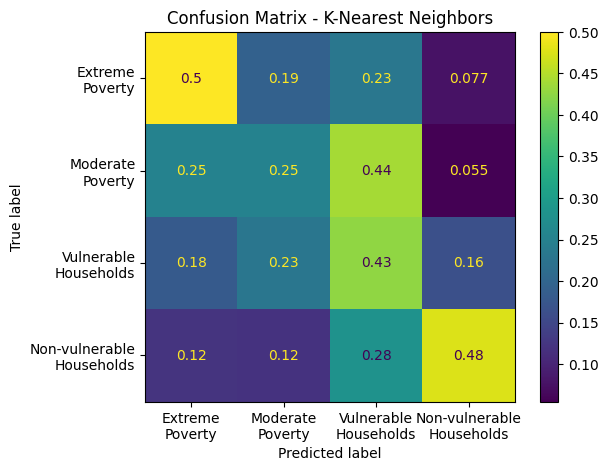

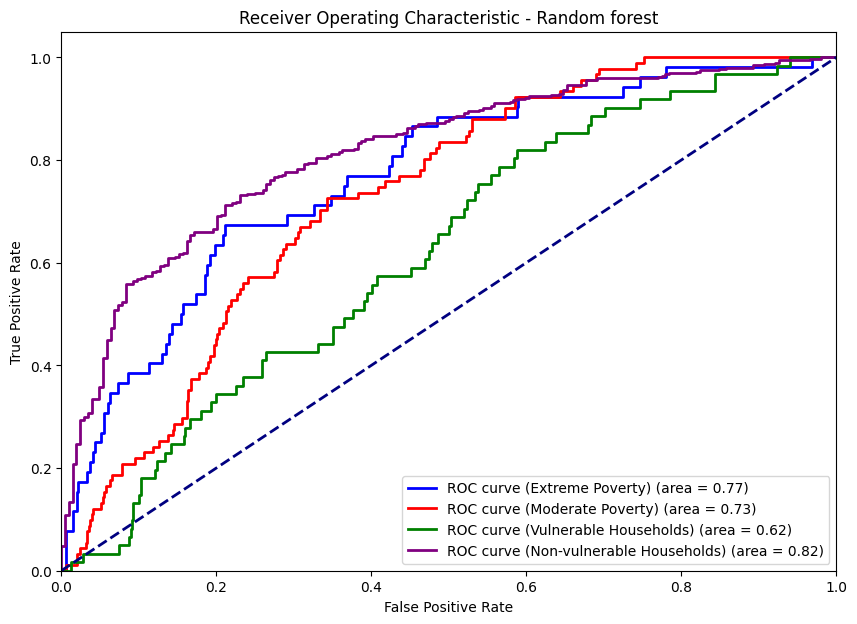

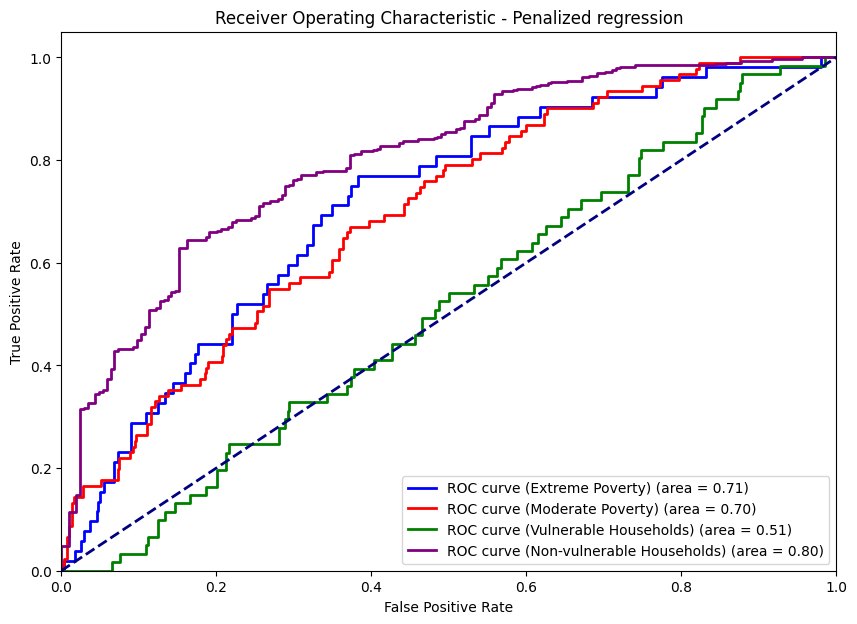

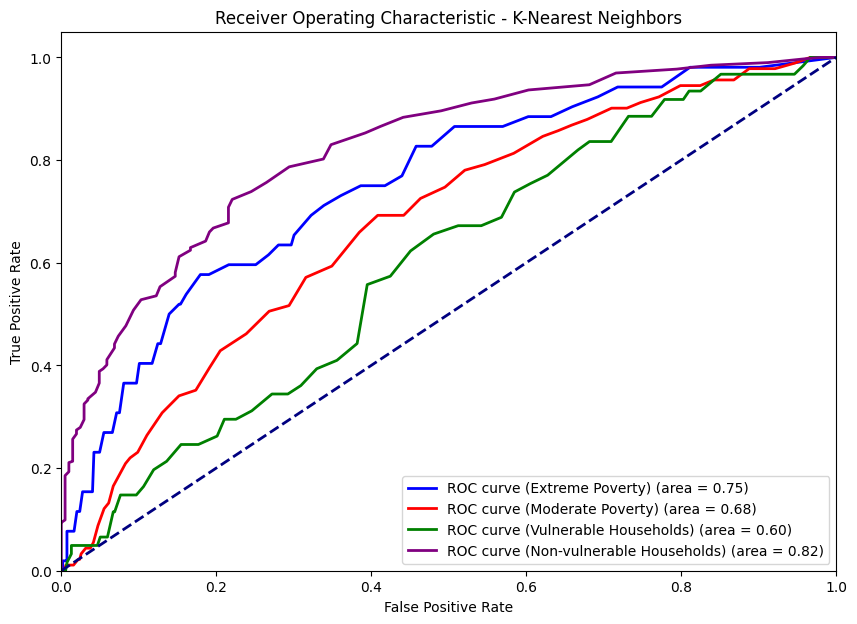

In [337]:
#Confusion matrix for Random Forest
tuning.visualize_acc(rf_model, "Random forest", X_test, y_test)
tuning.visualize_acc(lm_model, "Penalized regression", X_test, y_test)
tuning.visualize_acc(knn_model, "K-Nearest Neighbors", X_test, y_test)

tuning.plot_roc_auc(rf_model, "Random forest", X_test, y_test)
tuning.plot_roc_auc(lm_model, "Penalized regression", X_test, y_test)
tuning.plot_roc_auc(knn_model, "K-Nearest Neighbors", X_test, y_test)

Accuracy: 0.617056856187291
F1 Score (macro): 0.3655719454959375


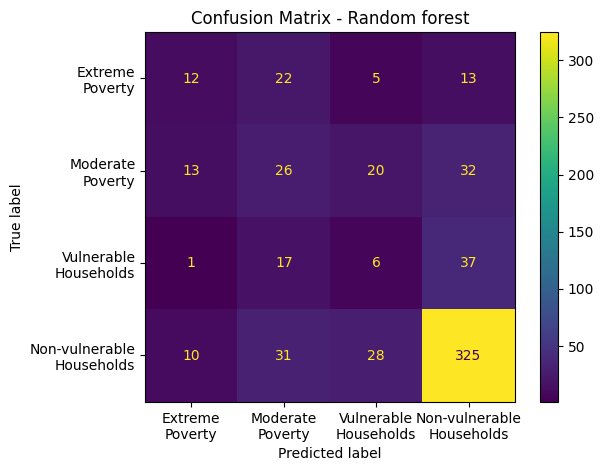

In [340]:
tuning.visualize_acc(rf_model, "Random forest", X_test, y_test, None)